In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr
import seaborn as sns
sns.set(style="ticks")

In [2]:
def magnitude_order(num): # from python blog
    absnum = abs(num)
    order = np.log10(absnum)
    res = np.floor(order)
    return res

In [3]:
sys.path.append('..')

In [4]:
df_sp = pd.read_csv('../Data/analyzed/municipalities_SP.csv')

## Some histograms

In [5]:
df_muns = pd.read_csv('../Data/age_groups_municipalities.csv')

In [6]:
df_muns = df_muns[['Municipio','Total']]

In [7]:
df_sp = df_sp.merge(df_muns, how = 'left',left_on = 'ID_MN_RESI', right_on = 'Municipio')

In [8]:
df_sp = df_sp.drop(columns = ['Unnamed: 0','Municipio'])

In [9]:
df_sp['Total_Approx'] = magnitude_order(df_sp['Total'])

In [10]:
df_sp['CASO_N'] = df_sp['CASO']/df_sp['Total']

Order of magnitude: 3.0. Cities: 41


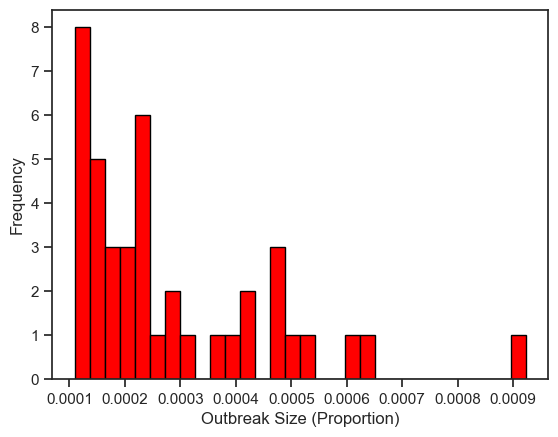

Order of magnitude: 4.0. Cities: 188


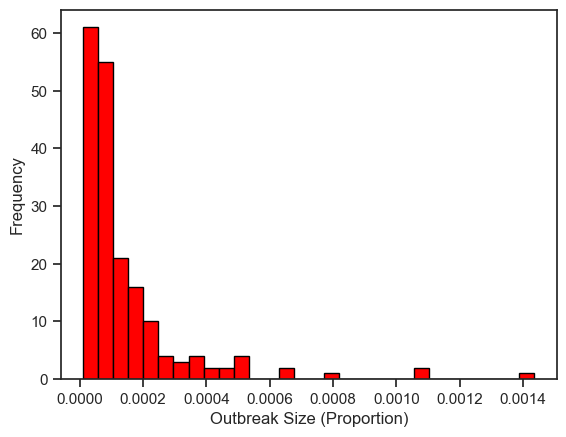

Order of magnitude: 5.0. Cities: 78


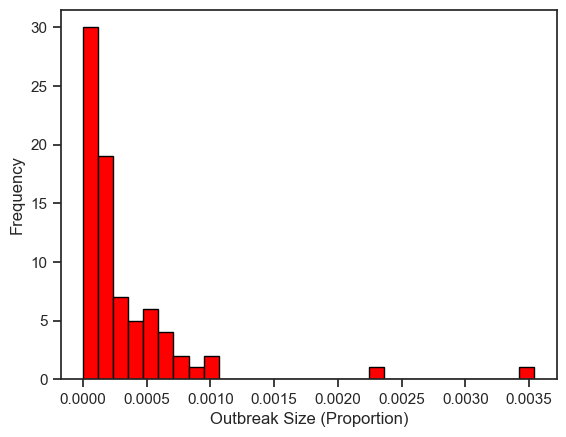

Order of magnitude: 6.0. Cities: 2


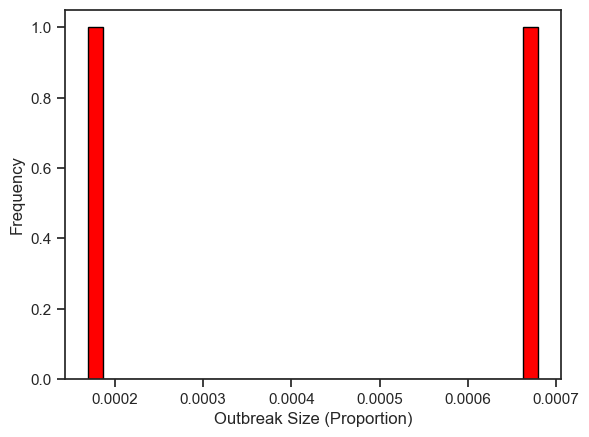

Order of magnitude: 7.0. Cities: 1


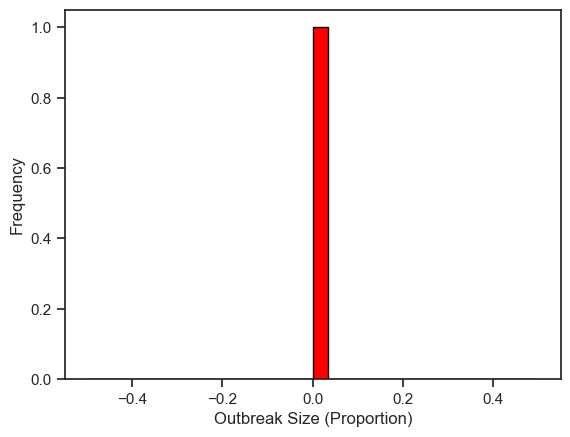

In [11]:
for o_mag in np.sort(df_sp['Total_Approx'].unique()):
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    #bins_vec = np.arange(0,0.5,0.0025)
    print('Order of magnitude: '+str(o_mag)+'. Cities: '+str(len(df_sp_aux)))
    plt.hist(df_sp_aux['CASO_N'], bins = 30, edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.show()

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_19172\2043159141.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_sp_aux['CASO_N'], label = 'Order = '+str(o_mag), linewidth = 4)


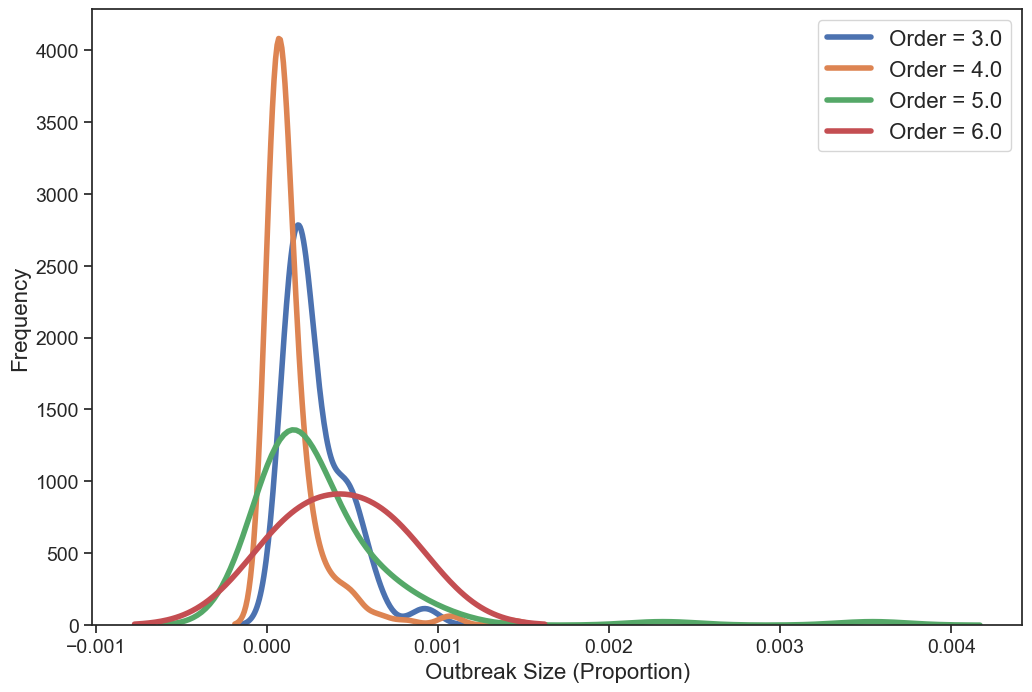

In [12]:
fig = plt.subplots(figsize = (12,8))
for o_mag in np.sort(df_sp['Total_Approx'].unique()):
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    sns.kdeplot(df_sp_aux['CASO_N'], label = 'Order = '+str(o_mag), linewidth = 4)
    plt.ylabel('Frequency', fontsize = 16)
    plt.xlabel('Outbreak Size (Proportion)', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Maps of SP

In [13]:
map_br = geobr.read_municipality()

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denise.cammarota\AppData\Loc

In [14]:
map_br['code_muni'] = map_br['code_muni'].astype(str).str[:6].astype(int)
map_br = map_br.merge(df_sp, how = 'left', left_on = 'code_muni', right_on = 'ID_MN_RESI')

In [15]:
map_br = map_br[map_br['abbrev_state'] == 'SP']

In [16]:
map_br['CASO_100'] = map_br['CASO_N']*(10**5)

In [17]:
map_br['CASO_100_LOG'] = np.log(map_br['CASO_100'])

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWa

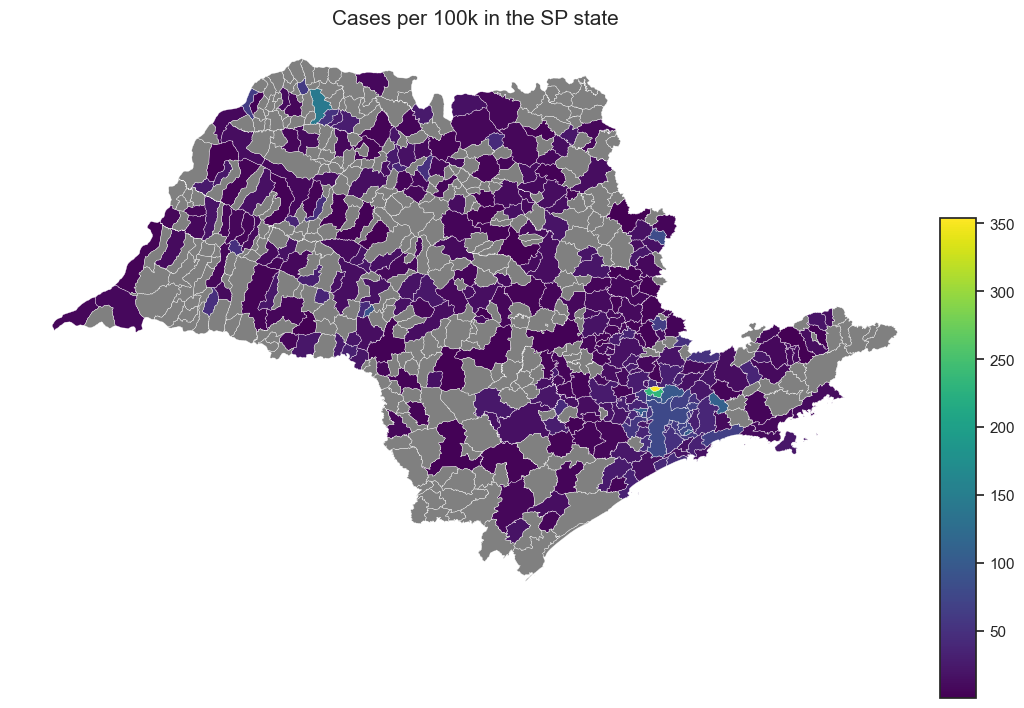

In [18]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='CASO_100', 
        missing_kwds=missing_kwds,
        linewidth=0.25, 
        cmap = 'viridis'
    )


cax = fig.add_axes(
        [
            0.9,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br["CASO_100"].min(),  
            vmax=map_br["CASO_100"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

axs.set_title(
    "Cases per 100k in the SP state",
    fontdict={"fontsize": 15},
    )

axs.axis("off") 
plt.show()

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWa

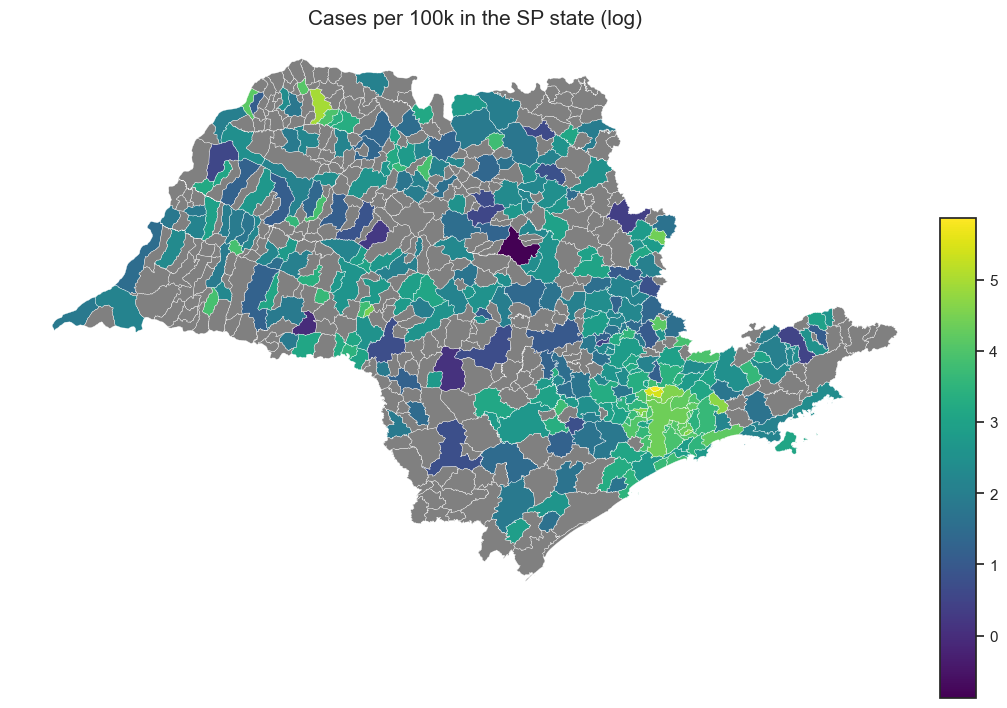

In [19]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='CASO_100_LOG', 
        missing_kwds=missing_kwds,
        linewidth=0.25, 
        cmap = 'viridis'
    )


cax = fig.add_axes(
        [
            0.9,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br["CASO_100_LOG"].min(),  
            vmax=map_br["CASO_100_LOG"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

axs.set_title(
    "Cases per 100k in the SP state (log)",
    fontdict={"fontsize": 15},
    )

axs.axis("off") 
plt.show()

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWa

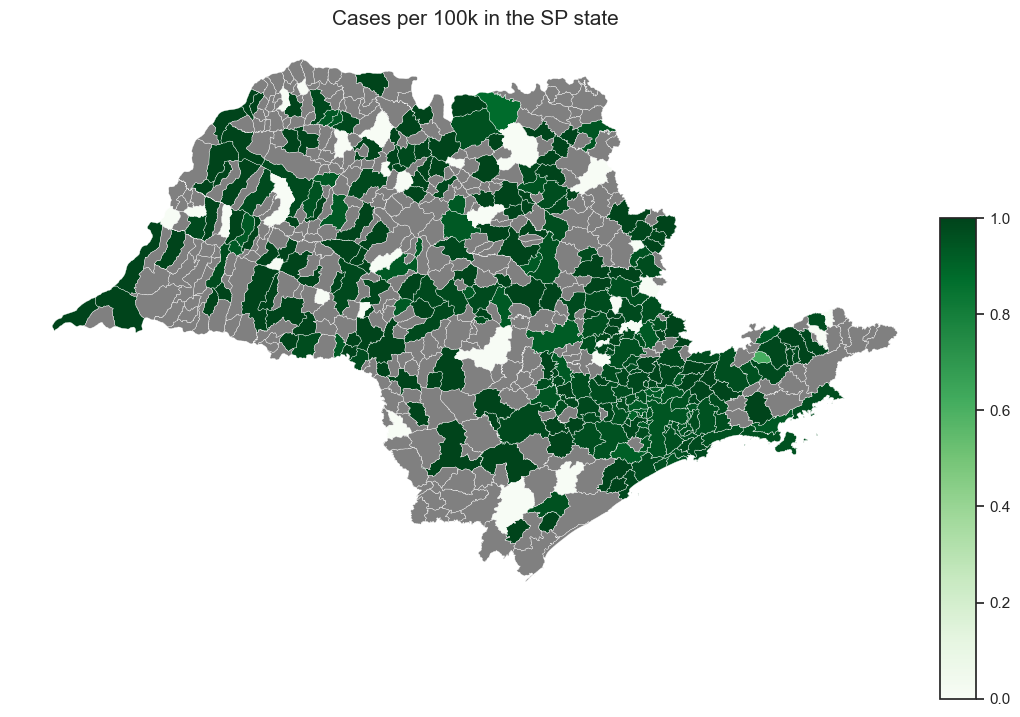

In [20]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='COV_1', 
        missing_kwds=missing_kwds,
        linewidth=0.25, 
        cmap = 'Greens'
    )


cax = fig.add_axes(
        [
            0.9,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="Greens",                                       
        norm=plt.Normalize(
            vmin=map_br["COV_1"].min(),  
            vmax=map_br["COV_1"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

axs.set_title(
    "Cases per 100k in the SP state",
    fontdict={"fontsize": 15},
    )

axs.axis("off") 
plt.show()